# Problem 1

Problem 1
There is an excel ‘Howden_CompanyXYZ_2021_Data’ (attached with this questionnaire). That file has two important tabs to be considered here.

-GL-np <br>
-MA-np <br>
They are the 2 lines of businesses (LOBs) for this company. Each tab has a Statistical data table and a Booked data table. (Assume: Currency is EUR)<br>

Use a python script to read the Statistical data table from the two tabs, combine and convert that to a CSV file with following headers:CompanyName, LineOfBusiness, Currency, Year, LossIncurredRatio and DevelopmentMonth.

# Solution

In [41]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
#Read the Excel sheets using pandas
file_name = 'Howden_CompanyXYZ_2021_Data (1).xlsx'

gl_np = pd.read_excel(file_name, sheet_name='GL-np', header=None)
ma_np = pd.read_excel(file_name, sheet_name='MA-np', header=None)

In [43]:
#Extract the required data from the DataFrames
def extract_data(df, company_name, line_of_business):
    loss_incurred_ratio = df.iloc[5:18, 2:15].values
    development_months = df.iloc[4, 2:15].values

    data = []

    for i, row in enumerate(loss_incurred_ratio):
        year = 2021 - (len(loss_incurred_ratio) - 1 - i) + 1  # the year assignment here
        for j, value in enumerate(row):
            data.append([
                company_name,
                line_of_business,
                'EUR',
                year,
                value * 100 if pd.notna(value) else value,  # percentage value
                development_months[j]
            ])

    return data

gl_data = extract_data(gl_np, 'Howden', 'GL-np')
ma_data = extract_data(ma_np, 'Howden', 'MA-np')

In [44]:
#Combine the data and create a DataFrame with the required headers
combined_data = gl_data + ma_data
headers = ['CompanyName', 'LineOfBusiness', 'Currency', 'Year', 'LossIncurredRatio', 'DevelopmentMonth']

result = pd.DataFrame(combined_data, columns=headers)

## Output: CSV file

In [45]:
#Convert the resulting DataFrame to a CSV file
result.to_csv('Howden_CompanyXYZ_2021_Data5.csv', index=False)

### Extra: Exploratory Data Analysis of the output file

In [52]:
#Read the CSV file and display the first few rows
data = pd.read_csv("Howden_CompanyXYZ_2021_Data5.csv")
print(data.head())

  CompanyName LineOfBusiness Currency  Year  LossIncurredRatio  \
0      Howden          GL-np      EUR  2010           6.416785   
1      Howden          GL-np      EUR  2010          13.919148   
2      Howden          GL-np      EUR  2010          19.561112   
3      Howden          GL-np      EUR  2010          25.580518   
4      Howden          GL-np      EUR  2010          38.400206   

   DevelopmentMonth  
0              12.0  
1              24.0  
2              36.0  
3              48.0  
4              60.0  


In [53]:
#Calculate basic statistics for numerical columns
print(data.describe())

              Year  LossIncurredRatio  DevelopmentMonth
count   338.000000         156.000000        312.000000
mean   2016.000000          41.562927         78.000000
std       3.747205          22.043611         41.491176
min    2010.000000           1.795011         12.000000
25%    2013.000000          23.495764         45.000000
50%    2016.000000          45.616683         78.000000
75%    2019.000000          58.300953        111.000000
max    2022.000000          93.627704        144.000000


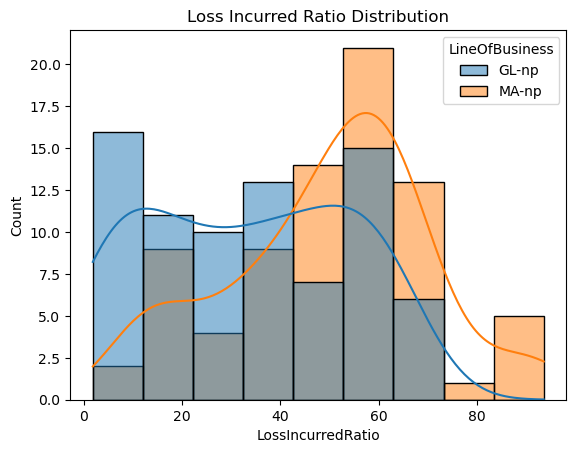

In [54]:
#Loss Incurred Ratio distribution for each Line of Business
sns.histplot(data=data, x="LossIncurredRatio", hue="LineOfBusiness", kde=True)
plt.title("Loss Incurred Ratio Distribution")
plt.show()

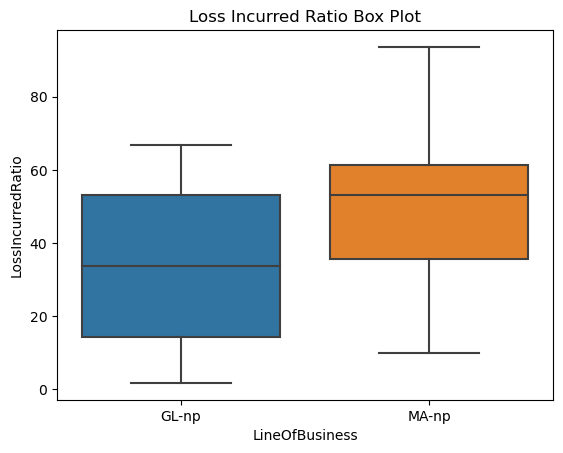

In [55]:
#Box plot of Loss Incurred Ratio for each Line of Business
sns.boxplot(x="LineOfBusiness", y="LossIncurredRatio", data=data)
plt.title("Loss Incurred Ratio Box Plot")
plt.show()

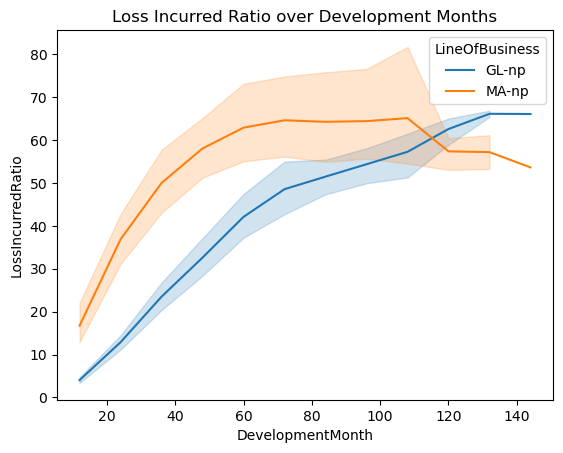

In [56]:
#Loss Incurred Ratio over Development Months for each Line of Business
sns.lineplot(data=data, x="DevelopmentMonth", y="LossIncurredRatio", hue="LineOfBusiness")
plt.title("Loss Incurred Ratio over Development Months")
plt.show()

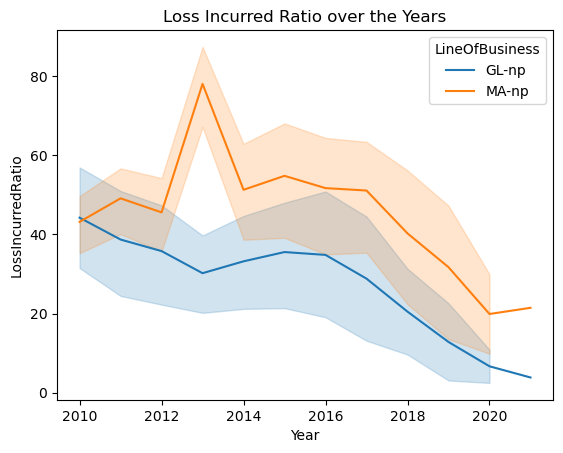

In [57]:
#Loss Incurred Ratio over the Years for each Line of Business
sns.lineplot(data=data, x="Year", y="LossIncurredRatio", hue="LineOfBusiness")
plt.title("Loss Incurred Ratio over the Years")
plt.show()